# **Introdução**

Nesse workshop iremos apresentar o processo de completo de desenvolvimento de projetos de aprendizado de máquina. Para isso, como estudo de casos iremos implementar um classificador de textos utilizando uma base de dados sobre resenhas de filmes. O objetivo da classificação é identificar resenhas positivas e negativas apenas baseado nos comentários apresentados.

**É importante destacar que o mesmo processo de desenvolvimento pode ser aplicado em outras bases de dados.**

# **Workflow para Desenvolvimento de Projetos**

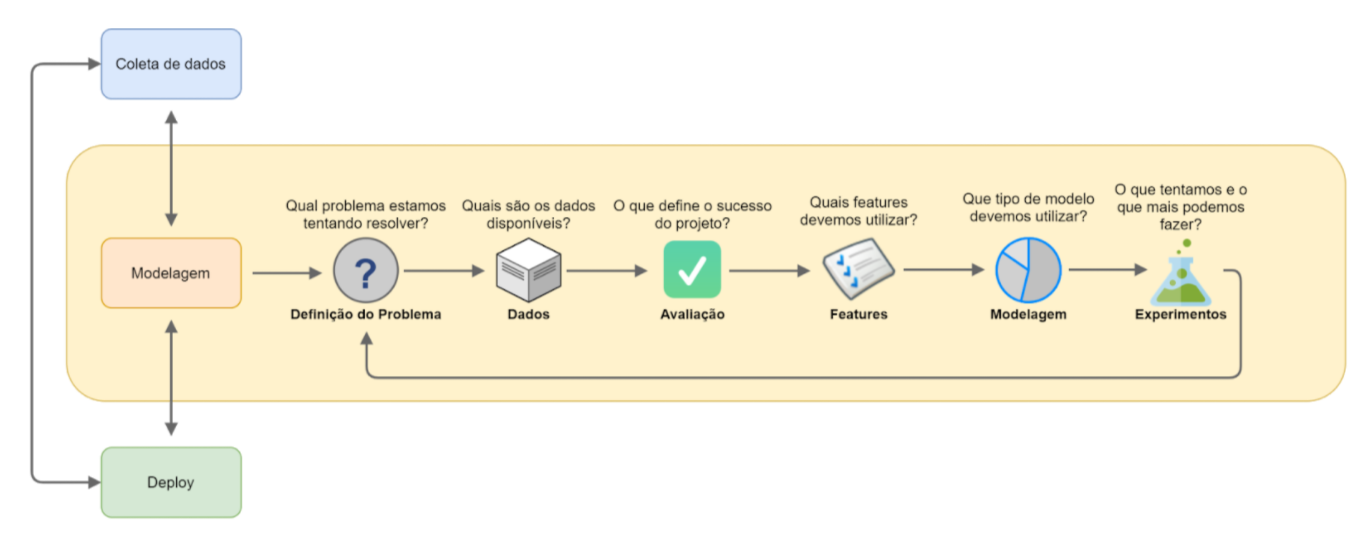

# **Ferrametas e Ambiente de Desenvolvimento**

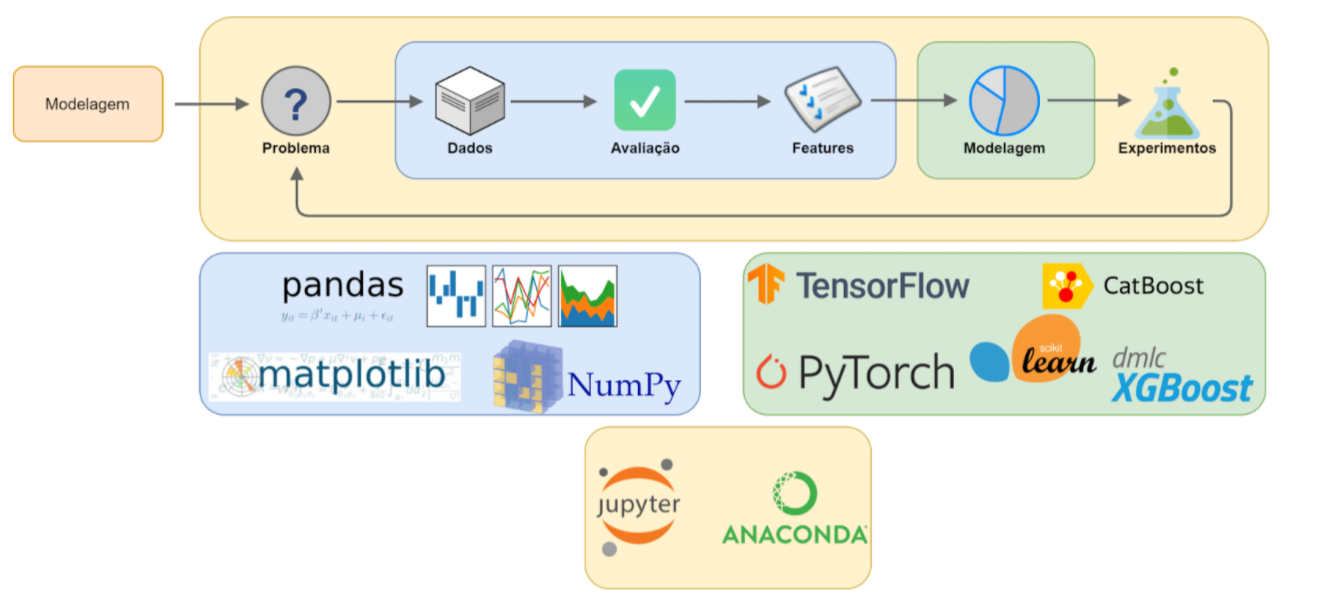

# **Ténicas de Aprendizado de Máquina para Classificação de Textos**

A classificação de textos em linguagem natural tem ganhado cada vez mais relevância devido a grande quantidade de aplicações que podem se beneficiar. Uma delas é a classificação de conteúdo de mensagens para automatização de serviços com chatbots. A classificação permite melhorar serviços como: diálogos com assistentes virtuais, serviços de resposta de dúvidas, marcação de compromissos, confirmação de entregas, etc. Este workshop apresenta práticas de uso de um arcabouço para análise e classificação de textos utilizando a linguagem de programação python. O workshop explora como utilizar ferramentas de aprendizado de máquina para classificação de textos com diferentes modelos de classificação. 

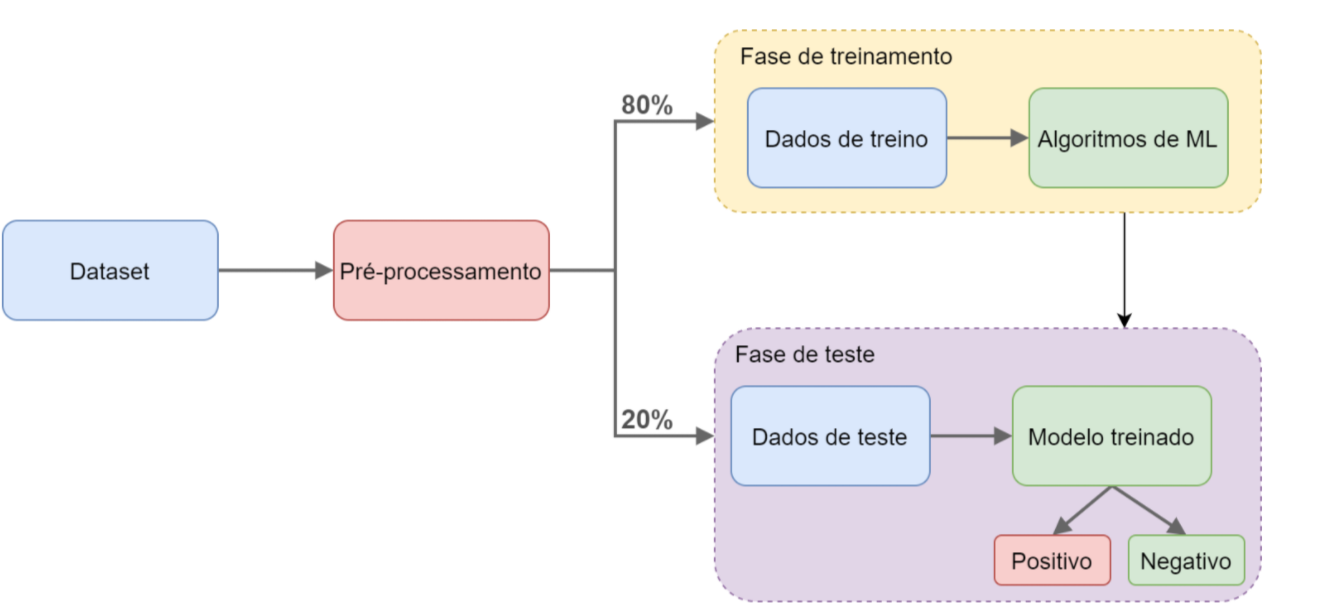

# **Estrutura do Workshop**

* Obtenção e análise inicial dos dados
* Estruturação dos dados
* Pré-processamento
* Organização de treino e teste
* Treinamento
* Testes e avaliação
* Aprimorando Resultados

# **1. Obtenção dos dados**

In [ ]:
!wget http://www.lrc.ic.unicamp.br/~ferraroni/imdb-ptbr.zip
!unzip "imdb-ptbr.zip"

--2021-05-18 20:41:27--  http://www.lrc.ic.unicamp.br/~ferraroni/imdb-ptbr.zip
Resolving www.lrc.ic.unicamp.br (www.lrc.ic.unicamp.br)... 143.106.7.163
Connecting to www.lrc.ic.unicamp.br (www.lrc.ic.unicamp.br)|143.106.7.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50783959 (48M) [application/zip]
Saving to: ‘imdb-ptbr.zip.1’

imdb-ptbr.zip.1     100%[===================>]  48.43M  1.12MB/s    in 58s     

2021-05-18 20:42:25 (862 KB/s) - ‘imdb-ptbr.zip.1’ saved [50783959/50783959]

Archive:  imdb-ptbr.zip
replace imdb-reviews-pt-br.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 


A Figura abaixo mostra a listagem de arquivos do Google Colab após o comando de download de dataset e unzip terem sido executados.


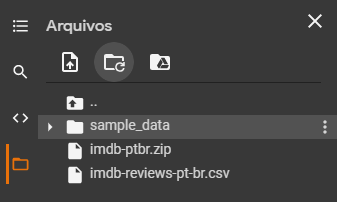


O arquivo ```imdb-reviews-pt-br.csv```, localizado na raiz do projeto, contem os dados que utilizaremos durante esse workshop.

# **1.1 Análise Inicial dos Dados**

In [ ]:
import pandas as pd

In [ ]:
#verificar informações sobre os dados
dados = pd.read_csv("imdb-reviews-pt-br.csv")
dados.head()

In [ ]:
len(dados)

In [ ]:
dados.shape

In [ ]:
dados = dados.sample(frac=0.5)

In [ ]:
#verificar se há dados nulos
dados.isna().sum()

In [ ]:
dados.isnull().sum()
#dados.dropna()

In [ ]:
dados.shape

In [ ]:
dados.info()

In [ ]:
dados.describe()

In [ ]:
#verificar quantidade de dados positivos e negativos
freq = dados["sentiment"].value_counts()
freq.plot.pie()

# **2. Estruturação dos dados**

A ideia da estruturação dos dados e classes é separar os dados que serão usados como entrada para o algoritmo (ou seja, X) e as classes que são esperadas na saída (ou seja, Y). Portanto, essa separação pode ser representada conforme a figura abaixo

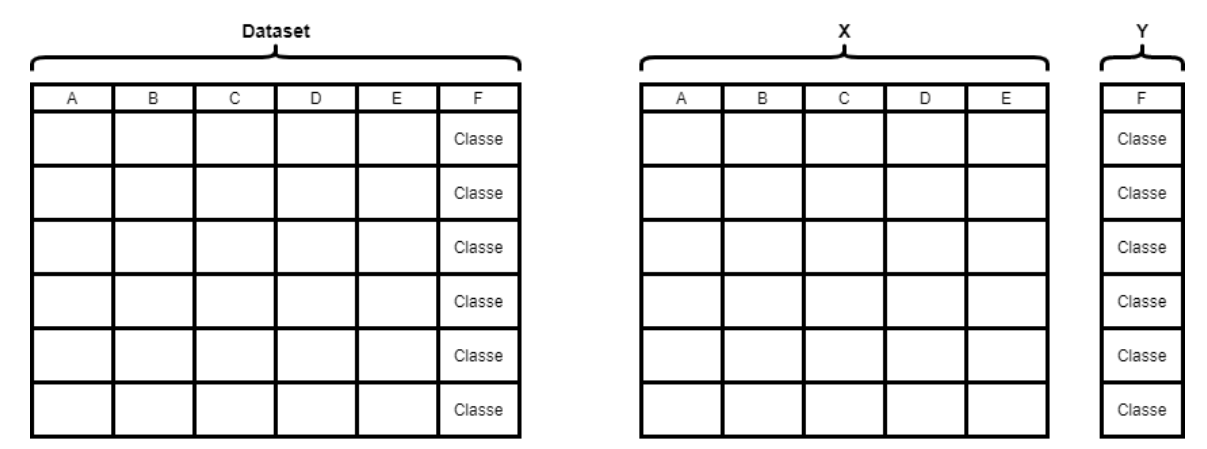

In [ ]:
dados.head()

In [ ]:
#segmentar conjunto de dados (X, Y)
Y = dados["sentiment"].values
X = dados["text_pt"].values

print(X[0])
print(Y[0])

In [ ]:
#Visualizar dados segmentados

# **3. Pré-processamento**

# **3.1 Tokenização**
A tokenização permite separar o texto em tokens utilizando uma regra pré-definida. [nltk.tokenize](https://www.nltk.org/api/nltk.tokenize.html)

Nesse workshop, utilizaremos a biblioteca ```nltk```, que é uma biblioteca específica para trabalhar com dados da língua humana. [nltk](https://www.nltk.org/)


Vamos utilizar a função ```nltk.tokenize.WhitespaceTokenizer()```, que permite a separação em tokens utilizando os espaços da frase.

In [ ]:
import nltk

tokenizador = nltk.tokenize.WhitespaceTokenizer()
print(tokenizador.tokenize("Primeiro workshop entre CI&T e UNICAMP"))
print(tokenizador.tokenize("TeStE >?>< das palavras --.-askdmn *#(@&$R dsa,..,..."))

## **3.2 Removendo pontuação e stopwords**






Essas palavras que não agregam valor semântico para as frases são chamadas de stop words. Vamos utilizar a lista de stop words do nltk para filtrar essas palavras.


Também é importante levar em consideração que como o nosso tokenizador está utilizando os espaços para separar as frases, vamos ter palavras concatenadas com a pontuação.

In [ ]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words("portuguese")
print(stop_words)

In [ ]:
from string import punctuation
pontuacao = list(punctuation)
print(pontuacao)

In [ ]:
pontuacao_e_stopwords = stop_words + pontuacao

# **3.3 Representação TFIDF + Ngrams**

**TFIDF** é utilizado para definir o quanto uma palavra é relevante em um corpus. Seu valor aumenta de acordo com a quantidade de vezes vezes que uma palavra aparece em um documento, e é reduzida pela quantidade de documentos que contêm a palavra.

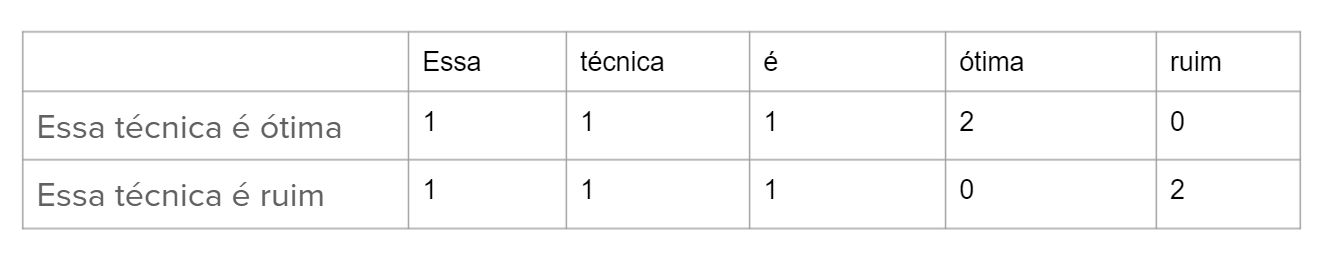

**Ngrams** é a junção de palavras próximos para criar novos tokens.

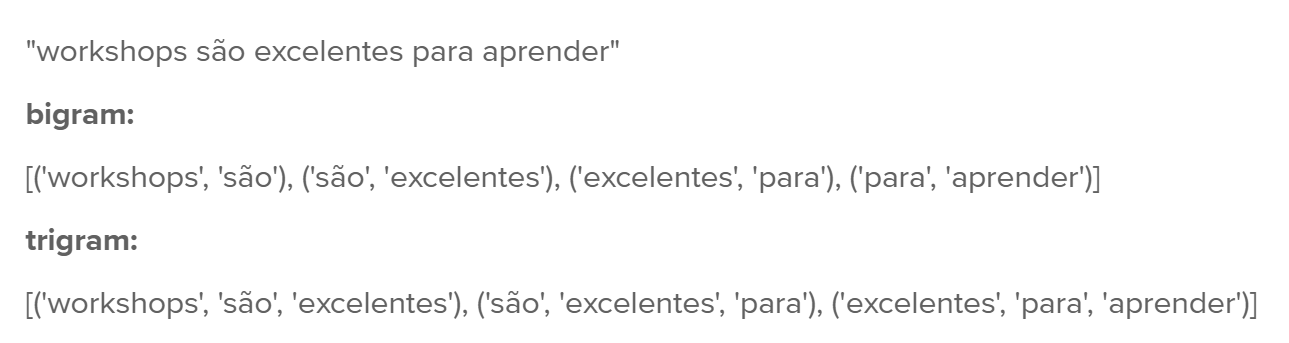

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True, ngram_range=(1, 2), stop_words=pontuacao_e_stopwords)

vetor_tfidf = tfidf.fit_transform(X)

vetor_tfidf[0]

# **4. Separando dados de Treino e Teste**

É importante ressaltar o porque precisamos dividir os dados que temos, e que muitas vezes são poucos, em dados de treino e dados de teste. Ao separar uma parte dos nossos dados para realizar testes nos modelos, podemos ter uma ideia de como os nossos resultados estão se saindo em relação a dados reais.

Dessa forma, é possível avaliar se os parâmetros utilizados, tempo de treinamento, modelo e outras variáveis estão convergindo para bons resultados.

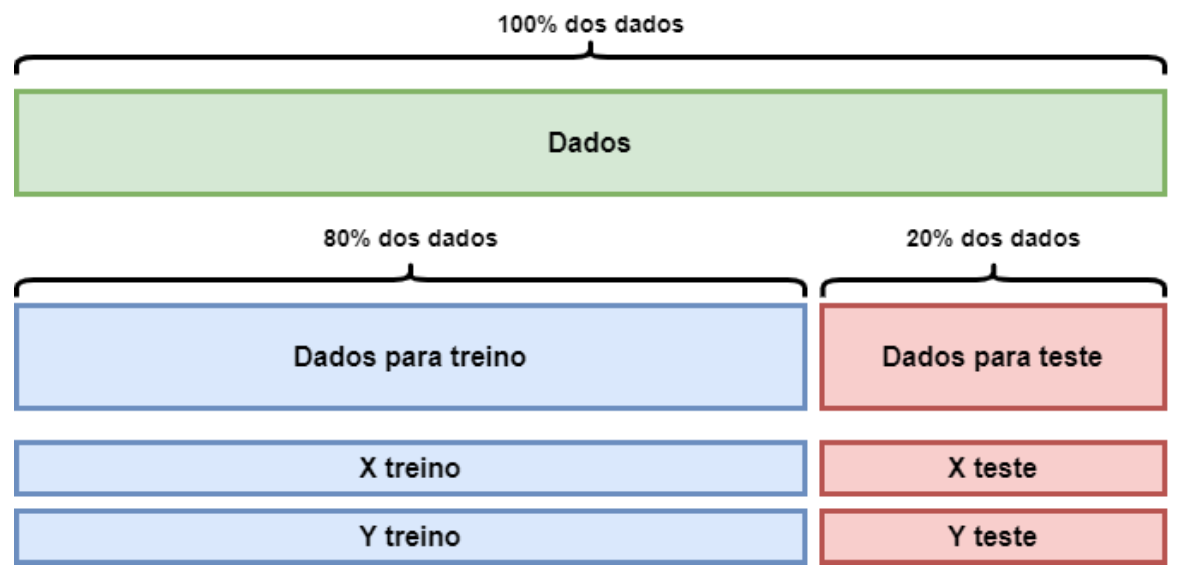

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(vetor_tfidf, Y, test_size = 0.2, random_state = 42) 

# **5. Treinando Classificadores**



## **5.1 KNN**

Neste algoritmo possuímos uma variável chamada de K, a qual é parte do nome do modelo e também o principal parâmetro a ser selecionado. Este parâmetro direcionará a quantidade de vizinhos (neighborn em inglês). Em casos de modelos binários, aonde possuímos apenas duas classes, em geral aplicasse valores ímpares a K, mas lembre que cada caso é um caso, “No free lunch”. Imagine que temos um valor P1 o qual queremos predizer, entre um grupo de duas classes aonde o valor atribuído a K foi 1 (K=1), primeiro iremos identificar o ponto mais próximo a ele e depois qual a label que o identifica (classe A por exemplo)



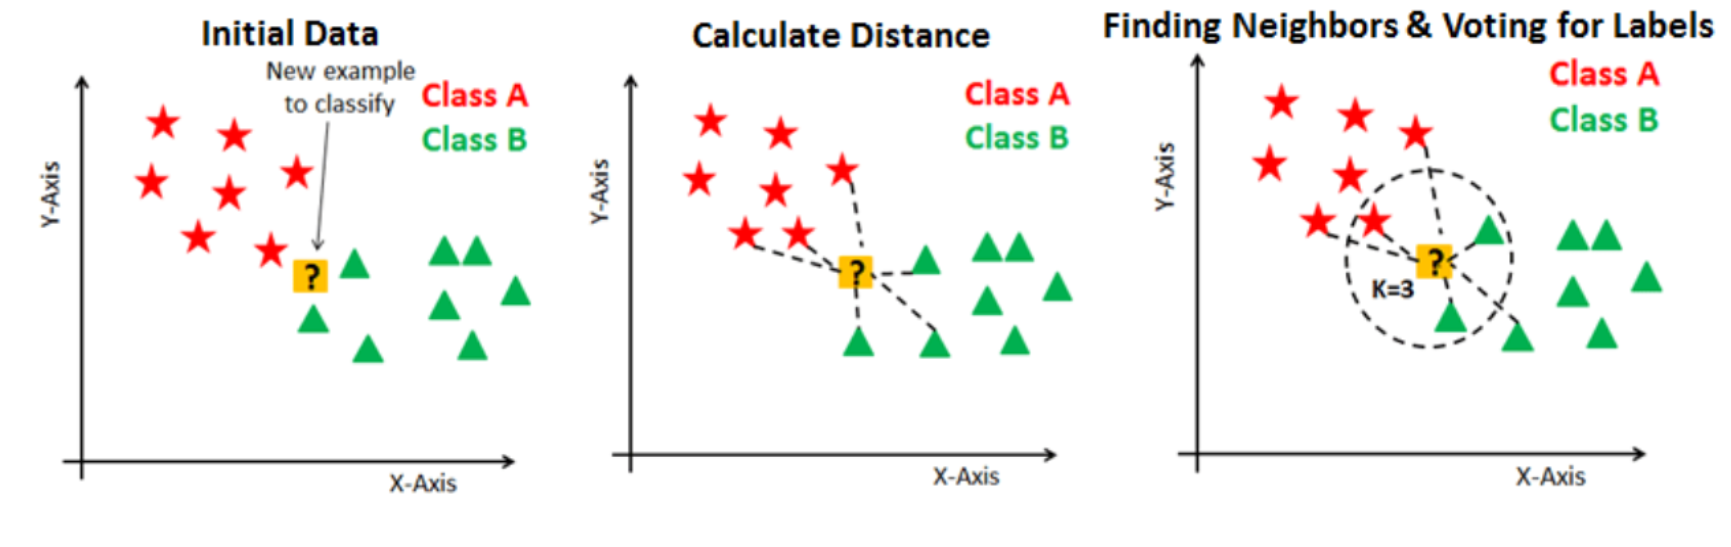

Após identificar o ponto mais próximo e identificar a label deste ponto (Ex.: Classe A), iremos predizer a que classe o ponto P1 faz parte. Para identificar de fato a que grupo o ponto P1 faz parte, iremos realizar uma votação aonde a maioria irá dizer a que classe este ponto P1 realmente faz parte. Para isso, é utilizado a medida de distância para identificar a distância existente entre o ponto P1 e os demais pontos do meu dataset, como K=1 o algoritmo irá verificar ponto a ponto, caso coloque o valor K=3 ele ira olhar a distância de P1 em relação a 3 pontos. Desta forma termos e distância existente entre P1 e todos os pontos do meu dataset, assim conseguiremos saber a quais pontos P1 é mais próximo, desta forma teremos qual classe ele é mais similar. Assim a “votação” será concluída, e saberemos como classificar P1.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)


# **6. Testando e Avaliando Classificadores**

A fase de teste consiste em avaliar o classificador, ou seja, para cada sequência de característica o classificador irá devolver como resultado uma classe. Assim, baseado em uma sequencia de características ainda não vista pelo classificador (x_teste) é possível comparar a saída (classe) dada pelo classificador para compara-lá com a saída esperada (y_teste)

**Realizando Predições**

In [ ]:
print(f'input x_test[0] -> valor real: {y_test[0]}, classificação KNN : {knn.predict(x_test[0])}')
print(f'input x_test[0] -> valor real: {y_test[100]}, classificação KNN : {knn.predict(x_test[200])}')
print(f'input x_test[0] -> valor real: {y_test[300]}, classificação KNN : {knn.predict(x_test[300])}')

In [ ]:
#vetor contendo as predições
knn_pred = knn.predict(x_test)
knn_pred

## **6.1 Métricas de Avaliação**

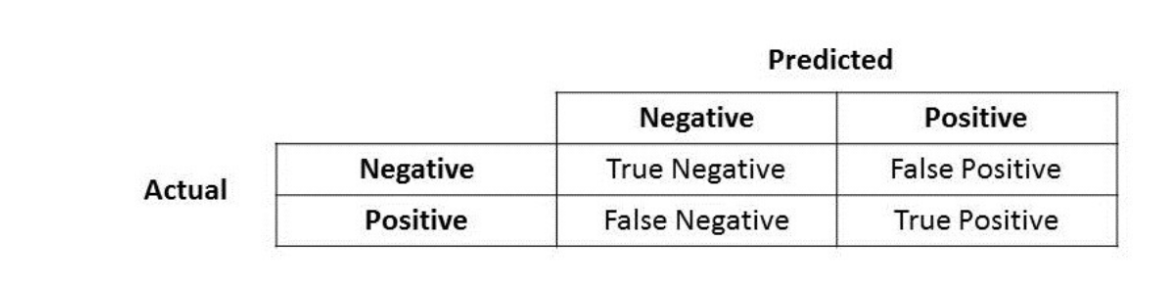

### **6.1.1 Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test, knn_pred)
accuracy_score

### **6.1.2 Precision**

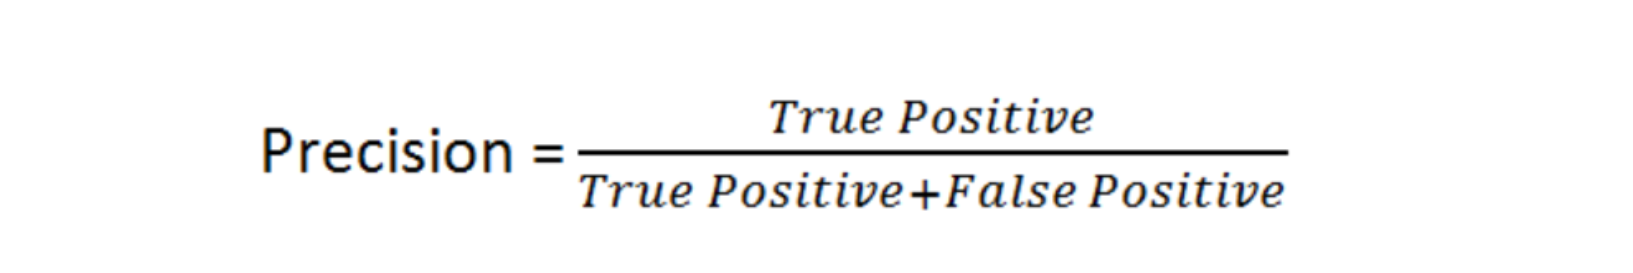

In [ ]:
from sklearn.metrics import precision_score

precision_score = precision_score(y_test, knn_pred, average='micro')

precision_score

### **6.1.3 Recall**

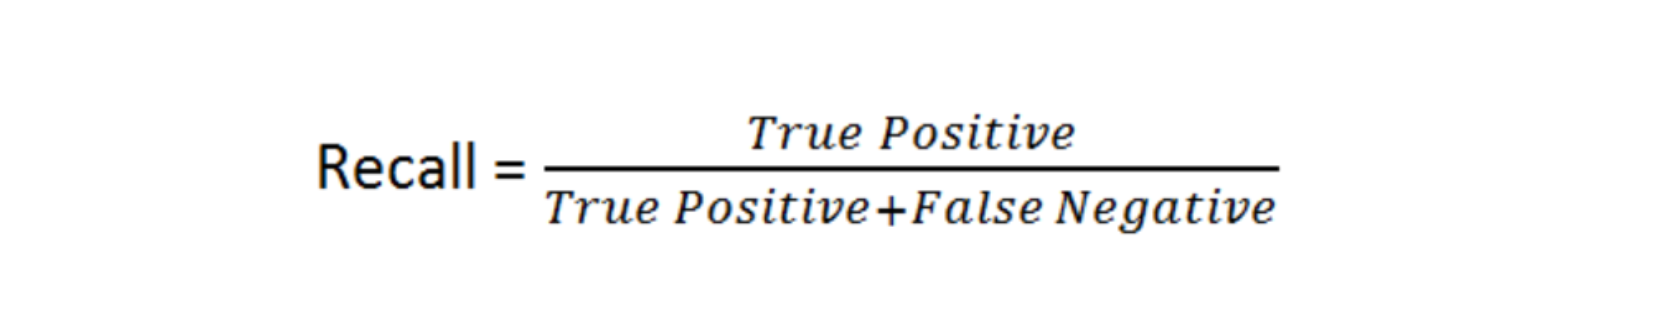

In [ ]:
from sklearn.metrics import recall_score

recall_score = recall_score(y_test, knn_pred, average = 'micro')

recall_score

## **6.2 Relatório de Classificação**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_pred, zero_division = 0))

## **6.3 Matriz de Confusão**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test, normalize = 'true');

# **7. Melhorando Resultados**

## **7.1 Cross-validation e Ajuste de Hyperparametros**

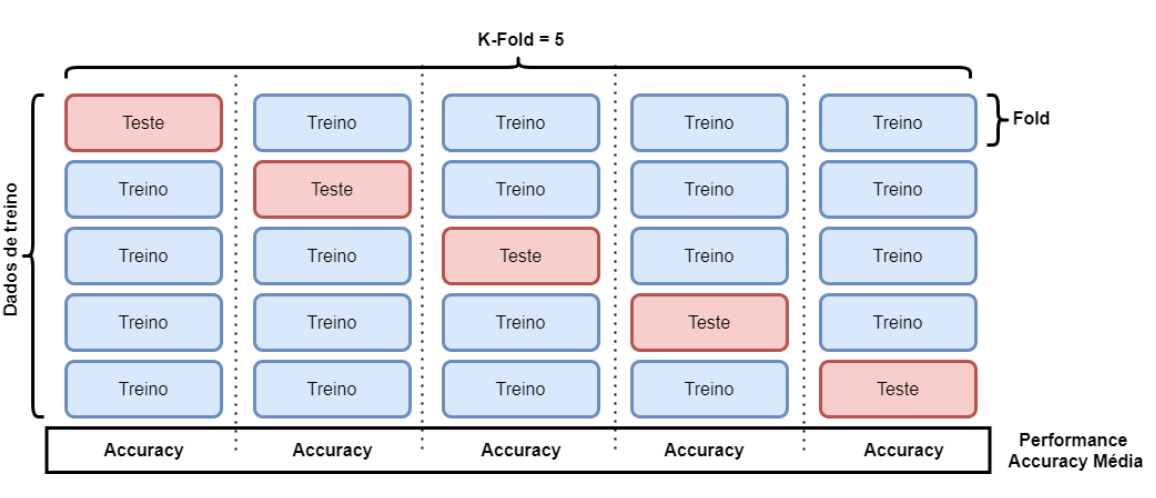

## **Avaliando Hyperparametros**

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy_list = []

Ks = [1, 3, 5, 10, 25, 50, 110, 220, 300]

for k in Ks:

  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train, y_train, cv = 5)

  accuracy_list.append(scores.mean())

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(Ks, accuracy_list)
ax_set(x_label="Valores de k", y_label="Valores de accuracy", xticks=Ks)
plt.show()